In [ ]:
import pandas as pd
df = pd.read_csv('/content/tested.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
df.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,True,True,False
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,False,False,True
2,894,0,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,True,True,False
3,895,0,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,True,False,True
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,False,False,True


In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


In [ ]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,0.363636,2.265550,29.599282,0.447368,0.392344,35.627188,1.839713
std,120.810458,0.481622,0.841838,12.703770,0.896760,0.981429,55.907576,1.519072
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800,1.000000
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200,1.000000
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000,2.000000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200,11.000000


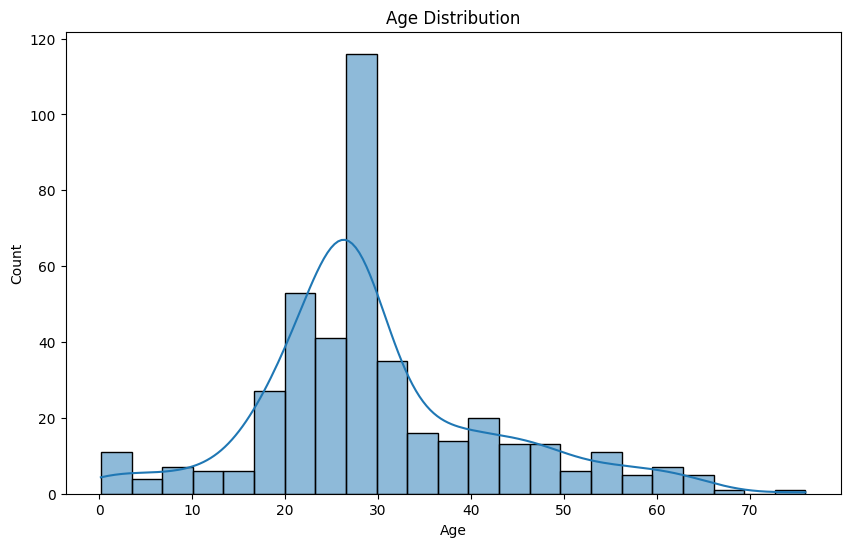

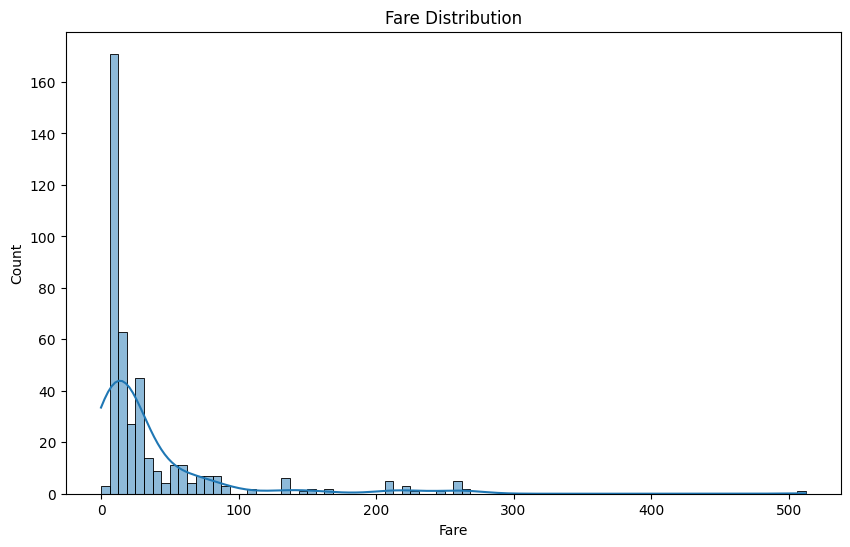

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()


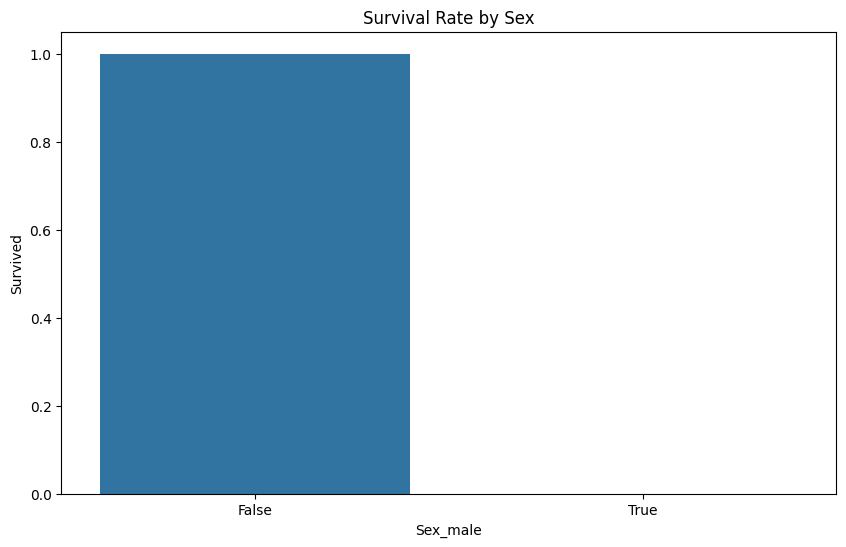

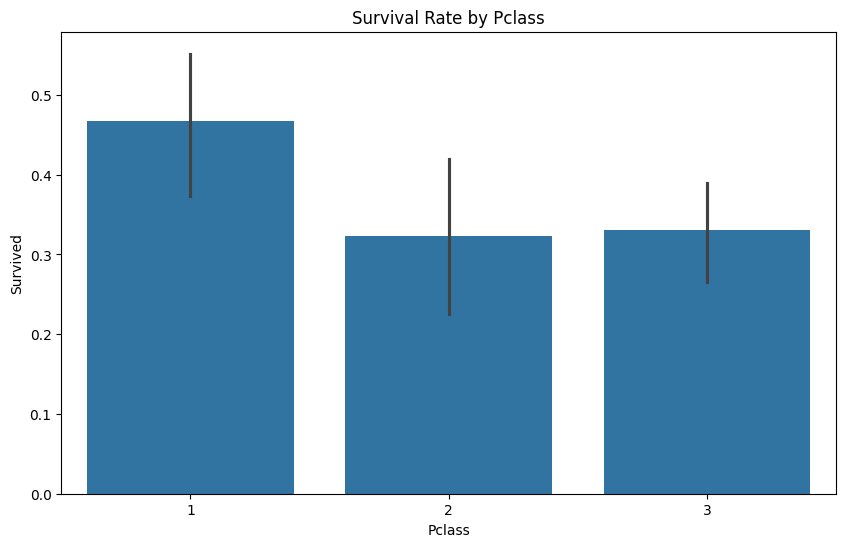

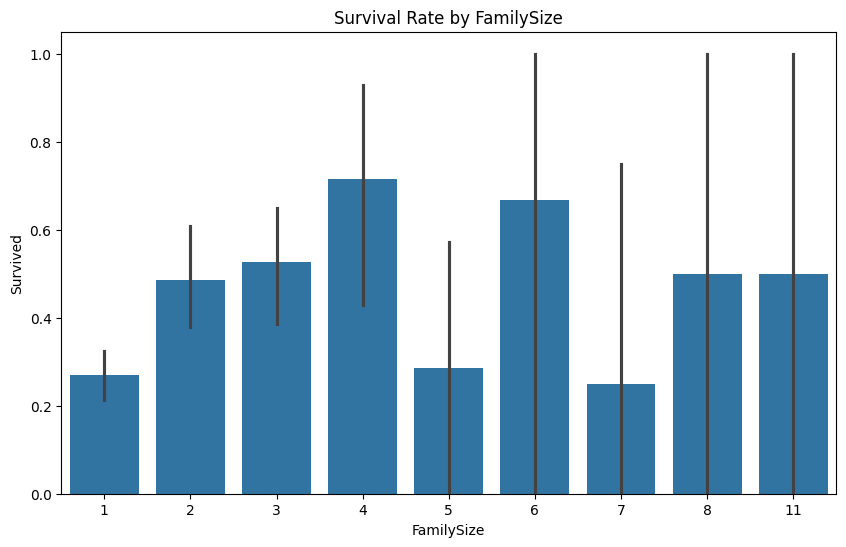

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex_male', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Pclass')
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by FamilySize')
plt.show()
